# SQuAD1.1 - Data Analysis

## Summary

Describe the SQuAD1.1 dataset in:
* Structure and volume of the data
* Term-frequency and TF-IDF of contexts and questions respectively
* Text length  of contexts and questions respectively

## Setup

In [1]:
%%bash
# Dowload the SQuAD1.1 data
curl -O https://data.deepai.org/squad1.1.zip
unzip -o squad1.1.zip -d data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8937k  100 8937k    0     0  9569k      0 --:--:-- --:--:-- --:--:-- 9559k


Archive:  squad1.1.zip
  inflating: data/dev-v1.1.json      
  inflating: data/train-v1.1.json    


In [2]:
# %%bash
#####################################################################
# Only use on Googgle Colab, uncomment if necessary
#####################################################################
# Clone the repo content into
# cd /content
# rm -rf deepqa
# git clone -b data_analysis https://github.com/PaulBeuran/deepqa.git

In [3]:
#####################################################################
# Only use on Googgle Colab, uncomment if necessary
#####################################################################
#%cd deepqa/notebooks/

In [15]:
# Import necessary librarires
import sys
import os
import pathlib

import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import wordcloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

deepqa_lib_path = str(pathlib.Path(os.getcwd()).parent.parent.absolute())
sys.path.insert(0, deepqa_lib_path)

from deepqa import preprocessing, analysis

In [5]:
# Read train and dev data
with open("data/train-v1.1.json", "rb") as j:
    train_data = json.load(j)["data"]
with open("data/dev-v1.1.json", "rb") as j:
    dev_data = json.load(j)["data"]

## Preprocessing

The data is constitued as a nested dictionary, stuctured as:
* `title` (ex: *World War 2*)
* `paragraphs`, a list of where each element is constitued of:
    * `context`, a piece of text used to contextualize the questions as a knowledge base on them (ex: *WW2 happened in 1939 to 1945, etc...*)
    * `qas`, listing all QAs in a list, as:
        * `question` (ex: *When did happened WW2 ?*)
        * `id`, as a hexadecimal code
        * `answers` or `plausible_answers`, the list of answers (or at least plausible ones), made of:
            * `text` (ex: *1939 to 1945*)
            * `answer_start`, indicating at what character index start the answer (ex: *16*)
        * `is_impossible`, a boolean indicating if the question is impossible ton answer

We will process it in two ways to be directly used for our data analysis:

* *Unwrapping*: transform the dictionary into 4 lists containing respectively each unique
subjects' titles, subjects' contexts, contexts' questions and questions' first answers
* *Tabularize*: transform the dictionary into a table-like double list, where each element
of the first list is an example containing all data rooting from an answer. As such, each
nested list contains a title, a context, a question and an answer, where the first 3 elements
can be repeated across examples (as in a table like a pandas' Dataframe)

In [6]:
titles, contexts, queries, answers = preprocessing.unwrap_squad11_data(train_data)
squad11_table = preprocessing.tabularize_squad11_data(train_data)

## Data structure and volumes

We'll first print a random example from the training data in its tabular form.

In [11]:
# Run this cell to get random examples
rand_idx = np.random.randint(len(squad11_table))
title, context, query, answer = squad11_table[rand_idx]
print(f"Title: {title}\n")
print(f"Context: {context}\n")
print(f"Query: {query}\n")
print(f"Answer {answer}")

Title: Pain

Context: Physical pain is an important political topic in relation to various issues, including pain management policy, drug control, animal rights or animal welfare, torture, and pain compliance. In various contexts, the deliberate infliction of pain in the form of corporal punishment is used as retribution for an offence, or for the purpose of disciplining or reforming a wrongdoer, or to deter attitudes or behaviour deemed unacceptable. In some cultures, extreme practices such as mortification of the flesh or painful rites of passage are highly regarded.

Query: What is corporal punishment used as retribution for?

Answer {'answer_start': 305, 'text': 'an offence'}


Except for the answer, all the elements are just textual data, in particular the context and the query.

As the SQuAD1.1 data goal is to find within the context which words answer a given query, the target, represented by the answer, has to be some part of the text, given here by the answer start character-wise and the answer, which can give the answer end by the length of it.

In [13]:
# Print volumes
print(f"# of titles: {len(titles)}")
print(f"# of contexts: {len(contexts)}")
print(f"# of queries: {len(queries)}")
print(f"# of contexts per titles {round(len(contexts)/len(titles), 3)}")
print(f"# of queries per contexts {round(len(queries)/len(contexts), 3)}")

# of titles: 442
# of contexts: 18896
# of queries: 87599
# of contexts per titles 42.751
# of queries per contexts 4.636


Data seem to be plentiful, with almost 88,000 context-query-answer triples, with an average of 4.6 query per contexts

## Term frequency

We will look now in the term frequency for contexts and queries respectively. Our goal is to find some

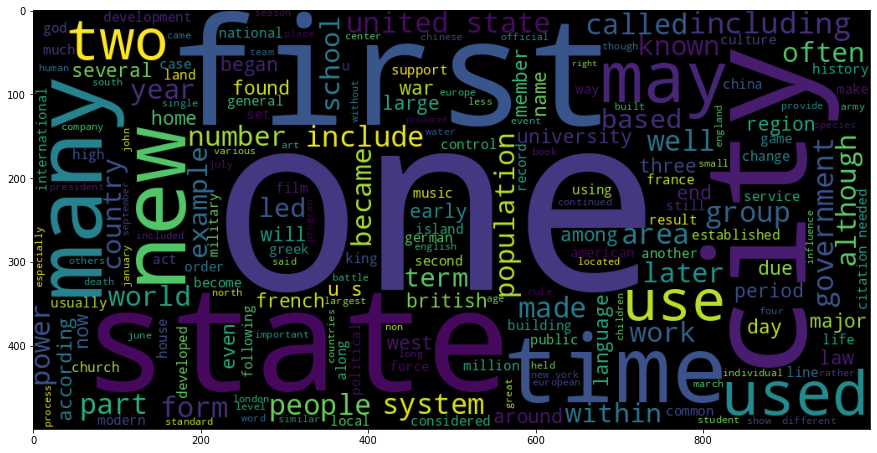

<Figure size 1080x576 with 0 Axes>

In [27]:
wc = wordcloud.WordCloud(width = 1000, height = 500)\
                .generate(" ".join([c.lower() for c in contexts]))

plt.figure(figsize=(15, 8))
plt.imshow(wc)
plt.figure(figsize=(15, 8))
plt.show()

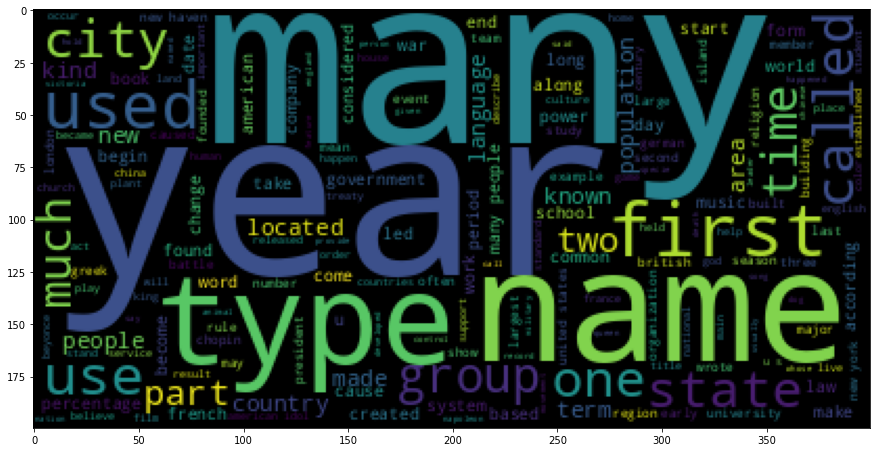

In [24]:
wc = wordcloud.WordCloud().generate(" ".join([c.lower() for c in queries]))
plt.figure(figsize=(15, 8))
plt.imshow(wc)
plt.show()